In [ ]:
from zipfile import ZipFile
from io import BytesIO
import urllib.request as urllib2
import pandas as pd
import numpy as np

In [ ]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, lasso_path
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

# Input
You are sourcing your data from `UCI Machine Learning Repository: Student Performance'. Using the Portuguese language data set.

https://archive.ics.uci.edu/ml/datasets/student+performance

Properly manipulate the data for model training.


In [ ]:
r = urllib2.urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip").read()
file = ZipFile(BytesIO(r))

df = pd.read_csv(file.open("student-por.csv"),sep=';')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


# Output

## 1) Describe and Understand the data.
- Read through the data description, properly label your data so that others can also understand the data you are working with
- Any kinds of feature engineering steps that you deem appropriate.


### Attribute Information:


 Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

### Explore the Data

In [ ]:
len(df.columns)

33

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
school,649,2,GP,423
sex,649,2,F,383
address,649,2,U,452
famsize,649,2,GT3,457
Pstatus,649,2,T,569
Mjob,649,5,other,258
Fjob,649,5,other,367
reason,649,4,course,285
guardian,649,3,mother,455
schoolsup,649,2,no,581


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [ ]:
# get numeric columns
df.select_dtypes(include=['int64']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [ ]:
# get categorical columns
df.select_dtypes(include=['object']).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

### Feature Engineering

In [ ]:
numerical = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'] #, 'G1', 'G2']
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']
target = 'G3' # drop G1 & G2 since highly correlated w/ G3

In [ ]:
# Dropping G1 and G2
df = df.drop(columns=['G1','G2'])

In [ ]:
# Impute any missing values with the mean
# Scale data between 0 and 1
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
])

In [ ]:
# Impute any missing values with the most frequently seen value
# OneHotEncode categorical features
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first',handle_unknown = 'ignore'))
])

In [ ]:
pre_processor = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numerical),
    ('categorical', categorical_pipeline, categorical),
])

## 2) Train-test split. (20pts)
You can choose the % allocation, and work only on the training data for the following steps.
- Draw out a Lasso path plot
- Use Lasso paths to pick out the 3 most and least relevant features
- Elaborate on why you think they are relevant or irrelevant

Note: since we work with PCA, standardizing data is more preferred than normalization. (see here, second paragraph, https://www.quora.com/Is-standardization-and-normalization-the-same-in-PCA-When-should-or-should-not-we-normalize-data-in-PCA)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target),df[target], test_size=0.2, random_state=42)

In [ ]:
X_train_proc = pre_processor.fit_transform(X_train)

In [ ]:
X_train_proc.shape

(519, 39)

### Lasso Path Plot

In [ ]:
alphas_lasso, coefs_lasso, _ = lasso_path(X_train_proc, y_train) #, alphas=[0.01,0.1,0.5,1,5,10])

In [ ]:
len(coefs_lasso)

39

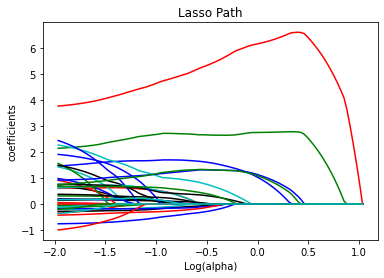

In [ ]:
colors = cycle(["b", "r", "g", "c", "k"])
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c)

plt.xlabel("Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso Path")
plt.axis("tight");

In [ ]:
features_coefs = pd.DataFrame(zip(X_train.columns, coefs_lasso),columns=['features','coefs'])

In [ ]:
features_coefs['mean_coef'] = features_coefs['coefs'].apply(lambda x: abs(x).mean())

In [ ]:
features_coefs.nlargest(n=5, columns=['mean_coef'])

,features,coefs,mean_coef
17,paid,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1081809238095...",2.275961
15,schoolsup,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.078771
23,famrel,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.774054
25,goout,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.403691
29,absences,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.311008


In [ ]:
features_coefs.nsmallest(n=5, columns=['mean_coef'])

,features,coefs,mean_coef
26,Dalc,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000
3,address,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....",0.000795
6,Medu,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.006054
7,Fedu,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....",0.007371
13,studytime,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.009970


Top 3 Most Relevant Features:
* paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no). Paid classes are a form of academic support, which can only benefit students. Also, paid classes imply these classes are of superior or at least very good quality.

* schoolsup: extra educational support (binary: yes or no). With any subject, extra support will lead to better understanding, performance, and grades. ince this support is educational, the student is getting helped in school subjects, which will enhance performance.

* famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent). Family plays a big part in a student's life outside of school, and definitely influences how they perform in school. A supportive familial environment would encourage and support students in their academics.

In [ ]:
df['paid'].describe()

count     649
unique      2
top        no
freq      610
Name: paid, dtype: object

In [ ]:
df['schoolsup'].describe()

count     649
unique      2
top        no
freq      581
Name: schoolsup, dtype: object

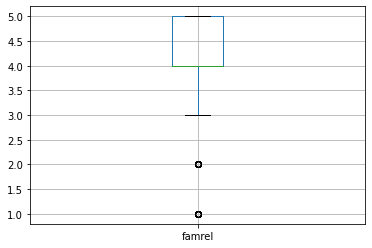

In [ ]:
df.boxplot(column='famrel')

Bottom 3 Least Relevant Features:
* Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high). Alcohol consumption doesn't have a relevant correlation with grades, because how much a student drinks shouldn't designate how well they perform. Completely sober students who rarely drink could perform poorly, whereas students with drinking problems could be anal high achievers.
* address: student's home address type (binary: 'U' - urban or 'R' - rural). eing urban or rural is not a relevant indicator as to how well a student can perform. Good students and bad students are everywhere, thus they live in both urban and rural areas.
* Medu/Fedu: mother's/father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education). In the modern day, parents regardless of their own education level,  encourage their children to do well in school.


In [ ]:
df['address'].describe()

count     649
unique      2
top         U
freq      452
Name: address, dtype: object

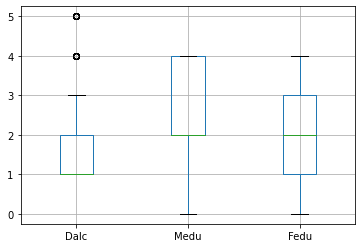

In [ ]:
df.boxplot(column=['Dalc','Medu','Fedu'])

## 3) Apply PCA to reduce feature dimension. (40pts)
Use a 3-fold cross-validation method to determine the number of dimensions (n_components) we should reduce the features to when fitting a LinearRegression model.
- Use mean-squared error as the evaluation metric
- Plot out the training/validation error curve corresponding to n_components
- Pick the best n_component and its corresponding training error


Define MSE scoring function to use with sklearn's GridSearchCV - https://scikit-learn.org/stable/modules/model_evaluation.html#scoring


In [ ]:
# greater_is_better = False changes the calculated value to negative
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

### PCA w/ OLS

In [ ]:
pipe = Pipeline([('preprocessing', pre_processor),
                 ("pca", PCA()),
                 ("linear_regression", LinearRegression())
                ])

In [ ]:
pca_grid = GridSearchCV(pipe, param_grid={'pca__n_components':range(1, 39, 2)}, scoring=mse_scorer,return_train_score=True, cv=KFold(3), refit=True)

pca_grid.fit(X_train, y_train)
#pca_grid.cv_results_

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                       

#### Plot training/validation error curve corresponding to n_components
https://stackoverflow.com/questions/62363657/how-can-i-plot-validation-curves-using-the-results-from-gridsearchcv

In [ ]:
n_components = pca_grid.cv_results_['param_pca__n_components']
train_scores = pca_grid.cv_results_['mean_train_score']
test_scores = pca_grid.cv_results_['mean_test_score']

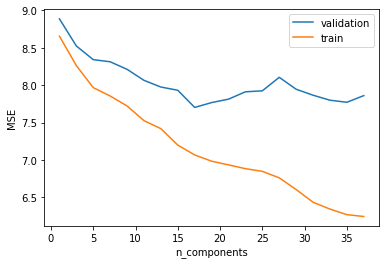

In [ ]:
plt.plot(n_components.data, test_scores * -1, label='validation')
plt.plot(n_components.data, train_scores * -1, label='train')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.ylabel('MSE')
plt.show()

In [ ]:
# Get explained variance ratio for each PC
pca_grid.best_estimator_[1].explained_variance_ratio_

array([0.14020759, 0.11989908, 0.0778427 , 0.06994473, 0.06236583,
       0.05520358, 0.0533363 , 0.05113084, 0.04601256, 0.03857826,
       0.03228378, 0.02450795, 0.02280575, 0.01967859, 0.01535741,
       0.01528673, 0.01383201])

#### Pick the best n_component and its corresponding training error

In [ ]:
print("Best parameter:", pca_grid.best_params_)

Best parameter: {'pca__n_components': 17}


In [ ]:
# The MSE is flipped to negative by the make_scorer b/c it takes the largest value under the hood, so * -1 for interpretability
print("Best Training MSE:", pca_grid.best_score_ * -1)

Best Training MSE: 7.702261592145777


In [ ]:
# Choose the best estimator to be the final model
pca = pca_grid.best_estimator_

## 4) Apply 3-fold CVs and search for the best lambdas for Lasso and Ridge.
Again, you need to specify evaluation metric as mean-squared error
- Get the best model for Lasso
- Repeat the same for Ridge


### Lasso

In [ ]:
lasso_pipeline = Pipeline([('preprocessing', pre_processor),
                 ("lasso", Lasso())
                ])

In [ ]:
lasso_grid = GridSearchCV(lasso_pipeline, param_grid={'lasso__alpha':[.01,.05,.1,.5,1,5,10,15,20,30,50]}, scoring=mse_scorer,return_train_score=True, cv=KFold(3))

lasso_grid.fit(X_train, y_train)
#lasso_grid.cv_results_

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                       

#### Plot training/validation error curve corresponding to alphas
https://stackoverflow.com/questions/62363657/how-can-i-plot-validation-curves-using-the-results-from-gridsearchcv

In [ ]:
lasso_alphas = lasso_grid.cv_results_['param_lasso__alpha']
lasso_train_scores = lasso_grid.cv_results_['mean_train_score']
lasso_test_scores = lasso_grid.cv_results_['mean_test_score']

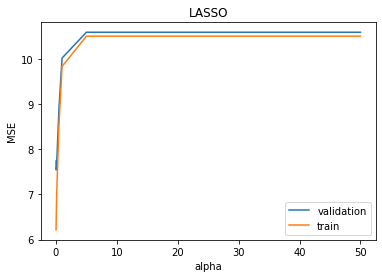

In [ ]:
plt.plot(lasso_alphas.data, lasso_test_scores * -1, label='validation')
plt.plot(lasso_alphas.data, lasso_train_scores * -1, label='train')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('LASSO')
plt.show()

In [ ]:
# Get coefficients for each feature
lasso_grid.best_estimator_[1].coef_

array([ 0.0594859 ,  0.13527868,  0.20500669, -0.01665484,  0.32573453,
       -0.86205424,  0.07974834, -0.0654102 , -0.09828446, -0.3292239 ,
       -0.02038897, -0.26355807, -0.15174688, -1.2992109 , -0.08727179,
        0.10455957,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.2677933 ,
       -0.        , -0.        , -0.38221322,  0.24795131, -0.0791619 ,
        0.        , -0.92474747,  0.        , -0.        ,  0.        ,
       -0.        ,  1.14601702,  0.11530238, -0.04943661])

#### Pick the best alpha and its corresponding training error

In [ ]:
print("Best parameter:", lasso_grid.best_params_)

Best parameter: {'lasso__alpha': 0.05}


In [ ]:
# The MSE is flipped to negative by the make_scorer b/c it takes the largest value under the hood, so * -1 for interpretability
print("Best Training MSE:", lasso_grid.best_score_ * -1)

Best Training MSE: 7.542642628439725


In [ ]:
# Choose the best estimator to be the final model
lasso = lasso_grid.best_estimator_

### Ridge

In [ ]:
ridge_pipeline = Pipeline([('preprocessing', pre_processor),
                 ("ridge", Ridge())
                ])

In [ ]:
ridge_grid = GridSearchCV(ridge_pipeline, param_grid={'ridge__alpha':[.01,.05,.1,.5,1,5,10,15,20,30,50]}, scoring=mse_scorer,return_train_score=True, cv=KFold(3))

ridge_grid.fit(X_train, y_train)
#ridge_grid.cv_results_

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'Medu',
                                                                          'Fedu',
                                                                          'traveltime',
                                       

#### Plot training/validation error curve corresponding to alphas
https://stackoverflow.com/questions/62363657/how-can-i-plot-validation-curves-using-the-results-from-gridsearchcv

In [ ]:
ridge_alphas = ridge_grid.cv_results_['param_ridge__alpha']
ridge_train_scores = ridge_grid.cv_results_['mean_train_score']
ridge_test_scores = ridge_grid.cv_results_['mean_test_score']

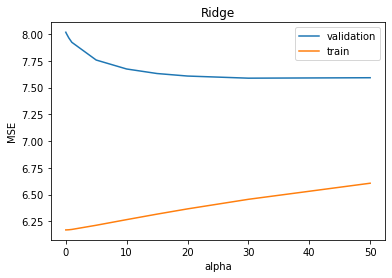

In [ ]:
plt.plot(ridge_alphas.data, ridge_test_scores * -1, label='validation')
plt.plot(ridge_alphas.data, ridge_train_scores * -1, label='train')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Ridge')
plt.show()

In [ ]:
# Get coefficients for each feature
ridge_grid.best_estimator_[1].coef_

array([ 0.11416925,  0.12394728,  0.24262091, -0.0512032 ,  0.32197811,
       -0.8649927 ,  0.14332223, -0.12006791, -0.16174535, -0.30027523,
       -0.02253822, -0.29424323, -0.19278101, -1.06063181, -0.28611673,
        0.29999151,  0.16791437, -0.08714571,  0.36656215, -0.02721452,
        0.12206889,  0.16158803, -0.12995849,  0.1037503 , -0.40593772,
       -0.01769774, -0.07953115, -0.52703735,  0.31592486, -0.2237745 ,
        0.22447906, -0.8844455 ,  0.04202555, -0.23269145,  0.16830436,
       -0.1043428 ,  1.01134193,  0.28309831, -0.27391324])

#### Pick the best alpha and its corresponding training error

In [ ]:
print("Best parameter:", ridge_grid.best_params_)

Best parameter: {'ridge__alpha': 30}


In [ ]:
# The MSE is flipped to negative by the make_scorer b/c it takes the largest value under the hood, so * -1 for interpretability
print("Best Training MSE:", ridge_grid.best_score_ * -1)

Best Training MSE: 7.587123498551432


In [ ]:
# Choose the best estimator to be the final model
ridge = ridge_grid.best_estimator_

## 5) Evaluate model performance among PCA
Using your test data; and conclude.
- From 3(c)
- LASSO from 4(a)
- Ridge from 4(b)


### Regression results from the data's corresponding publication using different algorithms: http://www3.dsi.uminho.pt/pcortez/student.pdf

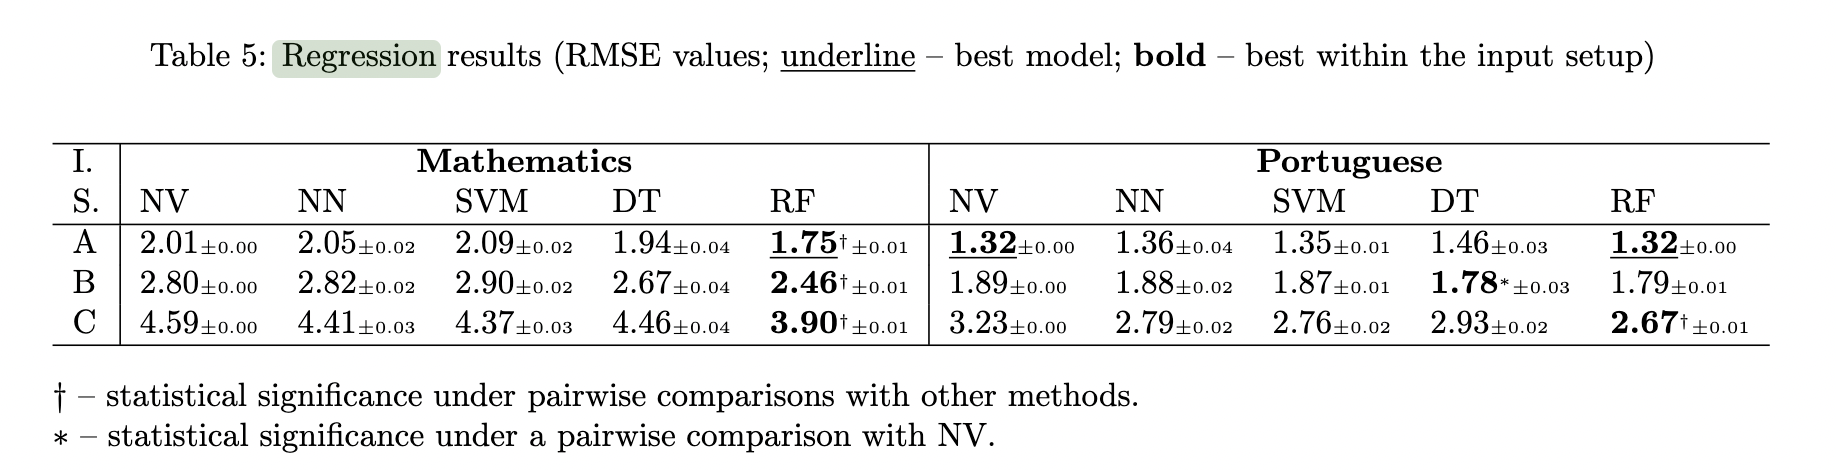

The RMSE is of the same order for all our trained models as this publication on the same dataset. Their performance is likely slightly better due to using nonlinear models to fit the data. (A: Includes G1 & G2, B: Excludes G2, C: Excludese G1 & G2, like our models do).

### PCA w/ OLS

In [ ]:
y_test_predict_pca = pca.predict(X_test)

In [ ]:
print("PCA Testing MSE:", mean_squared_error(y_test, y_test_predict_pca))
print("PCA Testing MAE:", mean_absolute_error(y_test, y_test_predict_pca))
print("PCA Testing RMSE:", mean_squared_error(y_test, y_test_predict_pca, squared=False))
print("PCA Testing R2:", r2_score(y_test, y_test_predict_pca))

PCA Testing MSE: 8.196245549982171
PCA Testing MAE: 2.105822849818992
PCA Testing RMSE: 2.862908582190876
PCA Testing R2: 0.15950735543616223


### LASSO

In [ ]:
y_test_predict_lasso = lasso_grid.predict(X_test)

In [ ]:
print("LASSO Testing MSE:", mean_squared_error(y_test, y_test_predict_lasso))
print("LASSO Testing MAE:", mean_absolute_error(y_test, y_test_predict_lasso))
print("LASSO Testing RMSE:", mean_squared_error(y_test, y_test_predict_lasso, squared=False))
print("LASSO Testing R2:", r2_score(y_test, y_test_predict_lasso))

LASSO Testing MSE: 7.852079634296169
LASSO Testing MAE: 2.071011919772789
LASSO Testing RMSE: 2.8021562473024537
LASSO Testing R2: 0.19480021225452504


### Ridge - Our best performing model

In [ ]:
y_test_predict_ridge = ridge.predict(X_test)

In [ ]:
print("Ridge Testing MSE:", mean_squared_error(y_test, y_test_predict_ridge))
print("Ridge Testing MAE:", mean_absolute_error(y_test, y_test_predict_ridge))
print("Ridge Testing RMSE:", mean_squared_error(y_test, y_test_predict_ridge, squared=False))
print("Ridge Testing R2:", r2_score(y_test, y_test_predict_ridge))

Ridge Testing MSE: 7.7973673717921725
Ridge Testing MAE: 2.065547388113501
Ridge Testing RMSE: 2.7923766529234864
Ridge Testing R2: 0.20041073891842598
